### Games_Sales

- Fields include
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.models.widgets import Tabs, Panel
output_notebook()


Loading BokehJS ...

In [6]:
df = pd.read_csv('data/games_sales.csv')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_row', 20)
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
df['Year'] = df['Year'].astype(int)
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
plat_Genre = pd.crosstab(df['Platform'], df['Genre'])
plat_Genre_Total = plat_Genre.sum(axis=1).sort_values(ascending=False)
plat_Genre_Total

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
        ... 
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Length: 31, dtype: int64

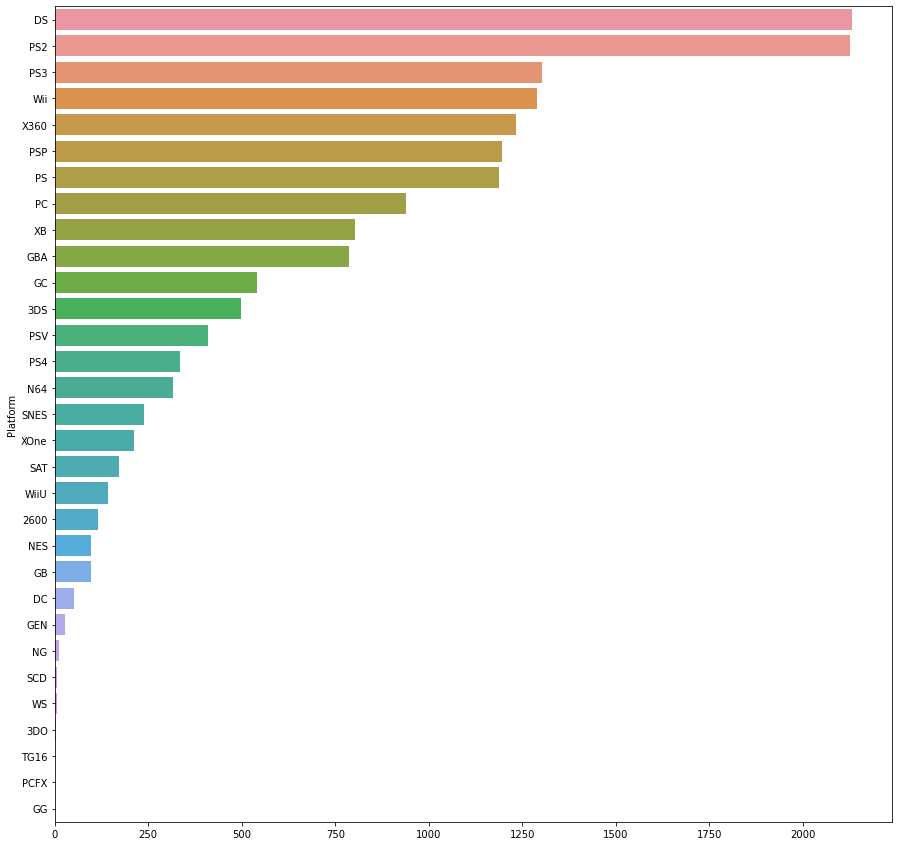

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(y=plat_Genre_Total.index, 
            x=plat_Genre_Total.values, 
            orient='h')
plt.xlabel = 'The amount of games'
plt.ylabel = 'Platform'
plt.show()


In [33]:
plat_Genre['Total'] = plat_Genre.sum(axis=1)
needed_data = plat_Genre[plat_Genre.Total > 1000].sort_values(by='Total', ascending = False)
needed_data
max_value = needed_data.values.max()
min_value = needed_data.values.min()

final_data = needed_data.append(pd.DataFrame(needed_data.sum(),
                                             columns=['Total']).T,
                                ignore_index=False)
final_data


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
DS,335,238,36,389,89,236,66,196,42,280,146,78,23441
PS2,345,196,146,218,101,18,212,183,158,89,391,70,23397
PS3,373,72,76,121,36,2,90,117,155,30,210,22,14344
Wii,230,83,41,272,57,54,92,35,61,84,256,25,14190
X360,318,47,65,122,24,6,102,75,197,36,215,27,13574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WiiU,63,3,5,21,16,4,3,6,10,1,8,3,1573
2600,55,1,1,5,9,8,4,0,22,1,10,0,1276
NES,13,1,4,2,28,14,4,11,7,0,14,0,1078
GB,6,5,0,8,18,15,2,21,1,5,9,7,1067


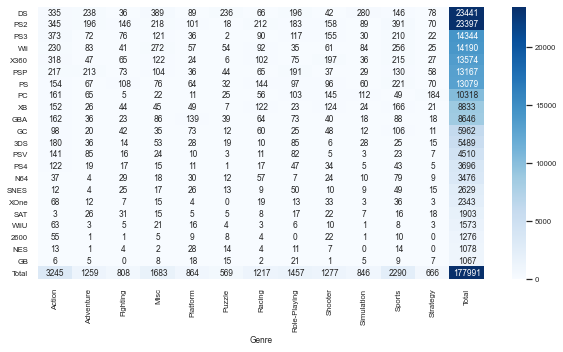

In [34]:
sns.set(font_scale=0.7)
plt.figure(figsize=(10,5))
sns.heatmap(final_data, vmin=min_value, vmax=max_value,
           annot=True, fmt='d', cmap="Blues")
plt.xticks(rotation=90)
plt.show()

In [35]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
GenreGroup

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Adventure,101.93,63.74,51.99,16.70,234.59,0.434503,0.271708,0.221621,0.071188
Fighting,220.74,100.00,87.15,36.19,444.05,0.497106,0.225200,0.196262,0.081500
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125
Puzzle,122.01,50.52,56.68,12.47,242.21,0.503736,0.208579,0.234012,0.051484
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298


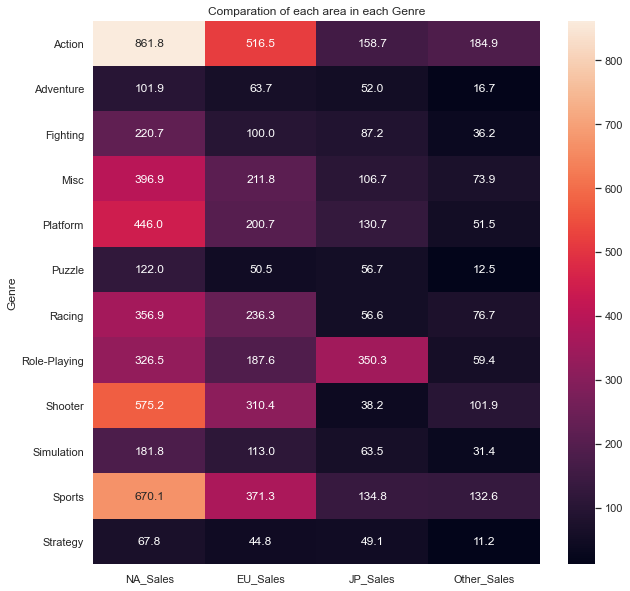

In [36]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.show()

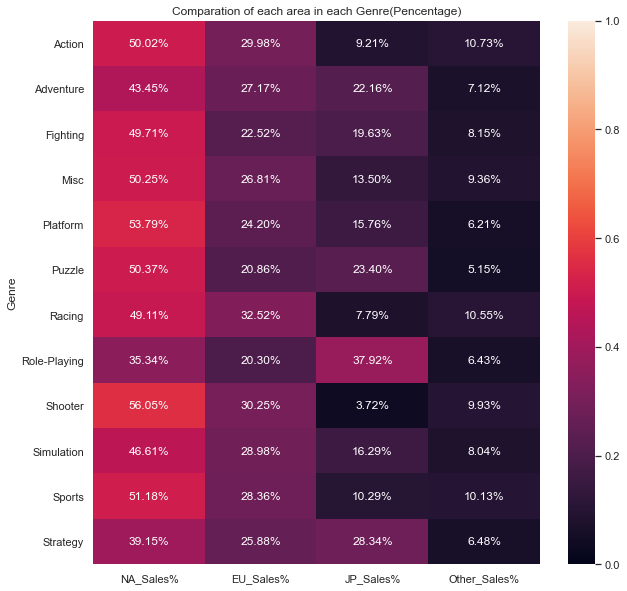

In [37]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()